In [54]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [55]:
#Load the Dataset
data = pd.read_csv("gaming_dataset.csv")

In [56]:
#Get dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PlayerID         15 non-null     int64  
 1   GamerGender      15 non-null     object 
 2   GamerAge         15 non-null     int64  
 3   AnnualGameSpend  15 non-null     int64  
 4   Playtime         15 non-null     int64  
 5   EngagementScore  15 non-null     int64  
 6   Feature_1        15 non-null     float64
 7   Feature_2        15 non-null     float64
 8   Feature_3        15 non-null     float64
 9   Feature_4        15 non-null     float64
 10  Feature_5        15 non-null     float64
 11  Feature_6        15 non-null     float64
 12  Feature_7        15 non-null     float64
 13  Feature_8        15 non-null     float64
 14  Feature_9        15 non-null     float64
 15  Feature_10       15 non-null     float64
 16  Feature_11       15 non-null     float64
 17  Feature_12       1

In [57]:
#load the Dataset Rows
data.head()

,PlayerID,GamerGender,GamerAge,AnnualGameSpend,Playtime,EngagementScore,Feature_1,Feature_2,Feature_3,Feature_4,...,Feature_60,Feature_61,Feature_62,Feature_63,Feature_64,Feature_65,Feature_66,Feature_67,Feature_68,Feature_69
0,1,Male,19,153,9,2,0.492,250.000,492.000,160.0,...,10.000,419.00,386.000,0.272,339.000,438.0,1.000,9.000,255.000,5.0
1,2,Male,21,158,1,3,328.000,6.000,0.702,22.0,...,209.000,8.00,257.000,254.000,1.000,9.0,0.799,27.000,0.731,6.0
2,3,Female,20,166,4,4,9.000,0.758,195.000,2.0,...,264.000,199.00,0.363,22.000,0.810,116.0,433.000,202.000,0.010,3.0
3,4,Female,23,167,7,5,232.000,432.000,3.000,403.0,...,3.000,57.00,128.000,401.000,0.000,9.0,2.000,0.595,6.000,179.0
4,5,Female,31,174,0,6,239.000,9.000,45.000,0.0,...,0.035,0.35,398.000,480.000,0.325,4.0,42.000,51.000,0.803,210.0


In [58]:
#Select Relevant Columns
data = data[['AnnualGameSpend','EngagementScore']]

In [59]:
#Check the Re-Adjust Dataset Shape
data.shape

(15, 2)

In [60]:
#Rename Columns
data = data.rename(columns={'AnnualGameSpend':'Spend',
                    'EngagementScore':'Score'})

In [61]:
#Reload the dataset
data.head()

,Spend,Score
0,153,2
1,158,3
2,166,4
3,167,5
4,174,6


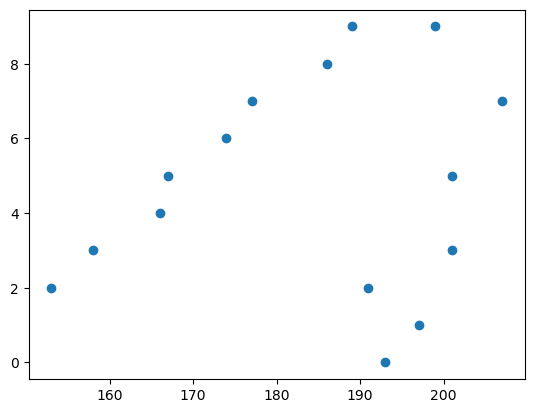

In [62]:
#Load the dataset datapoints
plt.scatter(data['Spend'],data['Score'])

C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarn

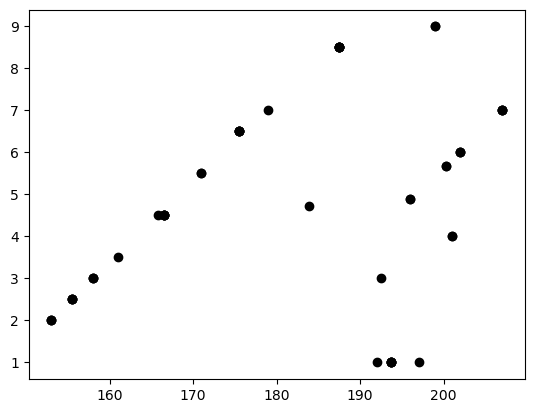

In [74]:
#Select the best Optimize Cluster value
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values :
    model = KMeans(n_clusters=k)
    model.fit(data[['Spend','Score']])
    wcss_error.append(model.inertia_)

In [64]:
#Check the WCSS Error
wcss_error

[4175.866666666667,
 899.2222222222223,
 558.5,
 325.5,
 225.66666666666669,
 100.66666666666666,
 66.0,
 49.333333333333336,
 33.666666666666664,
 17.0]

Text(0, 0.5, 'WCSS Error')

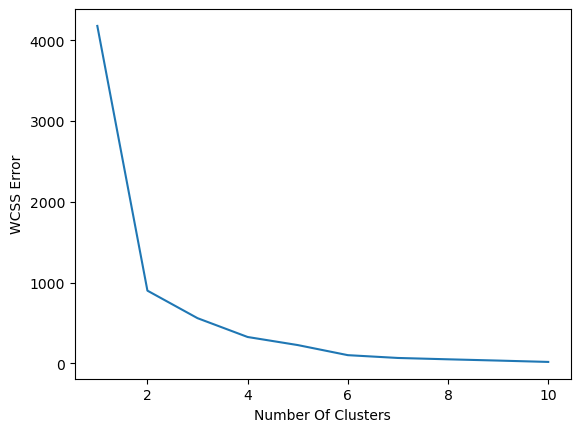

In [65]:
#Represent new data Clusters
plt.plot(k_values,wcss_error)
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS Error")

In [66]:
#Create a simple cluster model
model = KMeans(n_clusters=4)
prediction = model.fit_predict(data[['Spend','Score']])

C:\Users\User\anaconda3\envs\Clusters\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [67]:
#Get the prediction 
prediction

array([3, 3, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2], dtype=int32)

In [68]:
#Add the Cluster Column
data['cluster'] = prediction

In [69]:
#Reload the New Dataset
data.head()

,Spend,Score,cluster
0,153,2,3
1,158,3,3
2,166,4,1
3,167,5,1
4,174,6,1


In [70]:
#Load the clusters
model.cluster_centers_

array([[189.75,   4.75],
       [171.  ,   5.5 ],
       [201.  ,   5.  ],
       [155.5 ,   2.5 ]])

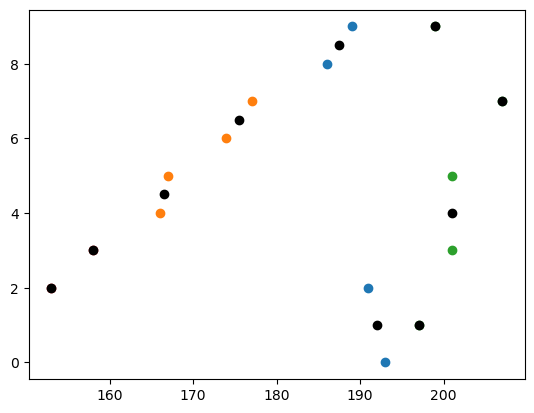

In [75]:
#Show clusters graphically
c1 = data[data['cluster'] == 0]
plt.scatter(c1['Spend'],c1['Score'])
c2 = data[data['cluster'] == 1]
plt.scatter(c2['Spend'],c2['Score'])
c3 = data[data['cluster'] == 2]
plt.scatter(c3['Spend'],c3['Score'])
c4 = data[data['cluster'] == 3]
plt.scatter(c4['Spend'],c4['Score'])